In [60]:
#Import Libraries
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import os
import cv2
import time
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [61]:
print(tf.__version__)

2.9.1


In [73]:
IMG_HEIGHT = 1008
IMG_WIDTH = 756
BATCH_SIZE = 16

#Load Data
TRAINING_DATA = tf.keras.utils.image_dataset_from_directory(
    "ARC Data",
    image_size = (IMG_HEIGHT, IMG_WIDTH),  
    batch_size = BATCH_SIZE,  
    shuffle = True
    
)





Found 6795 files belonging to 170 classes.


In [ ]:
#Feras could you try fixing the issue with the images loading in sideways?
# See if you can figure out something that I cant

# I think it's something to do with that the images were taken with a smartphone
# My research found that it could be something with the exif data on JPG images,
# as even when I rotate the pictures in the folder, the images are still rotated wrong



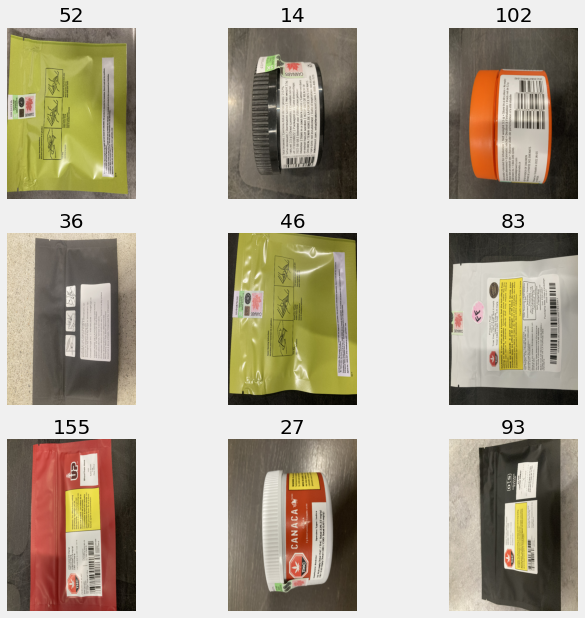

In [63]:
# For some reason all the images are loading in 
# rotated 90 degrees counter-clockwise

# if we can't fix it, we can easily rotate images coming in, but that feels wrong




plt.figure(figsize=(10, 10))
for images, labels in TRAINING_DATA.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [74]:
#Build Model
MODEL = tf.keras.Sequential(
    [
        #Rescale the images from 0-255 to 0-1 to make it easier to process
        tf.keras.layers.Rescaling(1./255),
        
        #Convolutional Layer 1
        tf.keras.layers.Conv2D(32, 3, activation='relu'),#Convolutional Layer
        tf.keras.layers.MaxPooling2D(),#Max Pooling Layer
        
        #Convolutional Layer 2
        tf.keras.layers.Conv2D(32, 3, activation='relu'),#Convolutional Layer
        tf.keras.layers.MaxPooling2D(),#Max Pooling Layer
        
        #Convolutional Layer 3
        tf.keras.layers.Conv2D(32, 3, activation='relu'),#Convolutional Layer
        tf.keras.layers.MaxPooling2D(),#Max Pooling Layer
        
        #Flatten the data for the Dense Layers
        tf.keras.layers.Flatten(),
        
        #Dense Layer 1
        tf.keras.layers.Dense(128, activation='relu'),
        #Dense Layer 2
        tf.keras.layers.Dense(3)
     
    ]
)



# THING TO REMEMBER:
# If we want to change stuff with the model we will most likely have to do it in here
# This is a bacic CNN, but we can mess around as much as we want to see if we can get it to work better


In [75]:
#Compile Model/Preprocess Model
MODEL.compile(
    optimizer='adam',
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    
)

In [76]:
#Getting Log Data
# We can hopefully see how it works easier with this
NAME = "cannabis-packaging-756x1008-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [77]:
#Train Model
#This is where we can change the number of times it runs and the validation split
MODEL.fit(
   TRAINING_DATA,
    epochs=10, 
    callbacks=[tensorboard]
)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User1\AppData\Local\Temp\ipykernel_13780\4041833064.py", line 3, in <cell line: 3>
      MODEL.fit(
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 153 which is outside the valid range of [0, 3).  Label values: 18 31 12 57 19 153 35 85 145 4 90 23 80 16 32 56
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_4131]